# NAVER 뉴스 데이터를 이용하여서 데이터 추출하기

## BeautifulSoup, Requests, Pandas 모듈 생성하기

데이터베이스 불러오기

In [71]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

뉴스별 데이터베이스 부르기

In [72]:
chosun_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='cp949', index_col=False)
korean_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
mail_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
midlle_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
money_today_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)
# chosun_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='cp949', index_col=False)
# korean_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
# mail_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
# midlle_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
# money_today_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)


데이터베이스 테스트하기

In [73]:
chosun_eilbo_database = chosun_eilbo_database.dropna()
chosun_eilbo_database.head(100)

,title,content,label,url
0,판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성...,0,https://n.news.naver.com/mnews/article/023/000...
1,이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기...,0,https://n.news.naver.com/mnews/article/023/000...
2,박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 ...,0,https://n.news.naver.com/mnews/article/023/000...
3,野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형...,0,https://n.news.naver.com/mnews/article/023/000...
4,“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에...,0,https://n.news.naver.com/mnews/article/023/000...
...,...,...,...,...
98,"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의...,0,https://n.news.naver.com/mnews/article/023/000...
99,"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80...,0,https://n.news.naver.com/mnews/article/023/000...
100,여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,"앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번...",0,https://n.news.naver.com/mnews/article/023/000...
101,흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [...,오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 ...,0,https://n.news.naver.com/mnews/article/023/000...


In [74]:
# korean_economy_database = korean_economy_database.dropna()
# korean_economy_database.head(100)

In [75]:
# mail_economy_database = mail_economy_database
# mail_economy_database.head(100)

In [76]:
# midlle_eilbo_database = midlle_eilbo_database.dropna()
# midlle_eilbo_database.head(100)

In [77]:
# money_today_database = money_today_database.dropna()
# money_today_database.head(100)

표본별 뉴스 제목중 하나 부르기

In [78]:
chosun_eilbo_database['title'][0]

'판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…'

뉴스 출처 홈페이지 추출하기

In [79]:
chosun_eilbo_database['url'][0]

'https://n.news.naver.com/mnews/article/023/0003701167'

## 깃허브 오픈소스 이용하기

### 토큰화로 바꾸는 파일 부르기

In [80]:
# $ git clone https://github.com/ukairia777/tensorflow-nlp-tutorial.git
# $ git clone https://github.com/haven-jeon/PyKoSpacing.git
# $ git clone https://github.com/ssut/py-hanspell.git
# %pip install soynlp
# %pip install customized_konlpy
# %pip install tensorflow
# %pip install kss
# %pip install konlpy
# %pip install soynlp
# %pip install customized_konlpy

In [81]:
from tokenization import *

In [82]:
from text_preprocessing_tools_for_korean_text import *

url 홈페이지 BeautifulSoup을이용해서 소스에 있는 내용 부르기

In [83]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
response_0 = requests.get(chosun_eilbo_database["url"][0], headers=headers)
soup_0 = BeautifulSoup(response_0.text, 'html.parser')
content_0_data = soup_0.find('div', {"id" : "dic_area"}).get_text()
content_0_data = content_0_data.replace('\n','').replace('\t','')
print(content_0_data)
new_content_0_data = content_0_data.replace(" ", '')

kospacing_new_content_0_data = spacing(new_content_0_data) 
print(kospacing_new_content_0_data)

판다. /픽사베이통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이 있다는 연구 결과가 나왔다.1일(현지 시각) CNN 등 외신에 따르면 미국 로스앤젤레스 자연사 박물관의 왕 샤오밍 박사 연구팀은 최근 약 600만년 전 자이언트 판다 조상인 아일루락토스(Ailurarctos) 화석을 분석한 결과, 대나무를 잡는 데 쓰이는 ‘가짜 엄지’가 존재했다고 밝혔다.이 화석은 중국 남부 윈난성 자오퉁시의 슈이탕바 지역에서 발굴됐다. 약 600만년 전 살았던 고대 판다 아일루락토스의 것이다. 눈여겨볼 것은 손목 부위에서 발견된 돌출 뼈다. 연구팀은 바로 이 뼈가 자이언트 판다가 가진 여섯 번째 손가락 일명 ‘가짜 엄지’라고 말했다.판다의 가짜 엄지. /뉴시스판다의 가짜 엄지는 대나무를 보다 쉽게 잡을 수 있도록 하는 데 쓰인다. 판다가 초식동물로 진화하는 데 중추적인 역할을 했을 것으로 전문가들은 보고 있다. 그동안 이같은 진화적 적응은 약 15만년 전인 비교적 최근 이뤄진 것으로 여겨져 왔는데, 이번 연구가 무려 600만년을 거슬러 올라간다는 것을 증명해낸 셈이다.화석에서 발견된 가짜 엄지는 현대 판다의 것보다 더 긴 길이의 직선 모양을 하고 있었다. 연구팀은 “가짜 엄지는 대나무를 잡고 뜯어먹을 때는 물론 다음 먹이를 찾아 걸어갈 때 몸무게를 지탱하는 용도로도 쓰이는데, 이 과정에서 긴 뼈가 짧은 갈고리형으로 진화하게 된 것”이라고 분석했다.왕 박사는 “대나무를 먹기 좋게 쪼개기 위해 줄기를 단단히 붙잡는 것은 많은 양의 대나무를 먹는 데 가장 중요한 적응”이라며 “육식성 조상에서 진화해 대나무만 먹는 종으로 바뀐 판다는 많은 장애를 넘어야 했을 것이고 가짜 엄지는 그중 가장 놀라운 진화”라고 설명했다.
1/1 [==============================] - 0s 62ms/step
판다. / 픽사베이통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성

In [84]:
print(twitter.morphs(kospacing_new_content_0_data))

['판다', '.', '/', '픽사', '베이', '통통', '한', '몸집', '과', '어울', '리지', '않게', '대나무', '를', '주식', '으로', '하는', '판다', '.', '이런', '판다', '의', '독특', '한', '식성', '이', '최소', '600', '만년', '전부', '터', '이어졌을', '가능성', '이', '있다는', '연구', '결과', '가', '나왔다', '.', '1일', '(', '현지', '시각', ')', 'CNN', '등', '외신', '에', '따르면', '미국', '로스앤젤레스', '자연사', '박물관', '의', '왕샤오밍', '박사', '연구', '팀', '은', '최근', '약', '600', '만년', '전', '자이언트', '판다', '조상', '인', '아', '일루', '락토스', '(', 'A', 'ilurarctos', ')', '화석', '을', '분석', '한', '결과', ',', '대나무', '를', '잡는', '데', '쓰이는', '‘', '가짜', '엄지', '’', '가', '존재', '했다고', '밝혔다', '.', '이', '화석', '은', '중국', '남부', '윈', '난', '성', '자오퉁시', '의', '슈이', '탕바', '지역', '에서', '발굴', '됐다', '.', '약', '600', '만년', '전', '살았던', '고대', '판다', '아', '일루', '락토스', '의', '것', '이다', '.', '눈', '여겨', '볼', '것', '은', '손목', '부위', '에서', '발견', '된', '돌출', '뼈', '다', '.', '연구', '팀', '은', '바로', '이', '뼈', '가', '자이언트', '판다', '가', '가진', '여섯', '번째', '손가락', '일명', '‘', '가짜', '엄지', '’', '라고', '말', '했다', '.', '판다', '의', '가짜', '엄지', '.', '/', '뉴시스', '

In [85]:
words_data = twitter.morphs(content_0_data)

뉴스 내용항목 중 한국어 불용어 제거하기

In [86]:
from remove_stopwords import *

In [87]:
with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
    stopwords_list = stopwords.read().split('\n')
print('불용어 제거 전 :',words_data) 
print()
print('불용어 제거 후 :',korean_change_no_stop_words(words_data, stopwords_list))

불용어 제거 전 : ['판다', '.', '/', '픽사', '베이', '통통', '한', '몸집', '과', '어울', '리지', '않게', '대나무', '를', '주식', '으로', '하는', '판다', '.', '이런', '판다', '의', '독특', '한', '식성', '이', '최소', '600', '만년', '전부', '터', '이어졌을', '가능성', '이', '있다는', '연구', '결과', '가', '나왔다', '.', '1일', '(', '현지', '시각', ')', 'CNN', '등', '외신', '에', '따르면', '미국', '로스앤젤레스', '자연사', '박물관', '의', '왕', '샤오밍', '박사', '연구', '팀', '은', '최근', '약', '600', '만년', '전', '자이언트', '판다', '조상', '인', '아', '일루', '락토스', '(', 'Ailurarctos', ')', '화석', '을', '분석', '한', '결과', ',', '대나무', '를', '잡는', '데', '쓰이는', '‘', '가짜', '엄지', '’', '가', '존재', '했다고', '밝혔다', '.', '이', '화석', '은', '중국', '남부', '윈난성', '자오퉁시', '의', '슈이탕바', '지역', '에서', '발굴', '됐다', '.', '약', '600', '만년', '전', '살았던', '고대', '판다', '아', '일루', '락토스', '의', '것', '이다', '.', '눈', '여겨', '볼', '것', '은', '손목', '부위', '에서', '발견', '된', '돌출', '뼈', '다', '.', '연구', '팀', '은', '바로', '이', '뼈', '가', '자이언트', '판다', '가', '가진', '여섯', '번째', '손가락', '일명', '‘', '가짜', '엄지', '’', '라고', '말', '했다', '.', '판다', '의', '가짜', '엄지', '.', '/', '뉴시스', '판

In [88]:
new_content_1 ='' 
for i in korean_change_no_stop_words(words_data, stopwords_list):
    new_content_1 += i
print(new_content_1)

판다./픽사베이통통한몸집어울리지않게대나무주식하는판다.판다독특한식성최소600만년터이어졌을가능성있다는연구결과나왔다.1일(현지)CNN외신따르면미국로스앤젤레스자연사박물관왕샤오밍박사연구팀은최근약600만년전자이언트판다조상인일루락토스(Ailurarctos)화석분석한결과,대나무잡는데쓰이는‘가짜엄지’존재했다고밝혔다.화석은중국남부윈난성자오퉁시슈이탕바지역발굴됐다.약600만년전살았던고대판다일루락토스이다.눈여겨볼은손목부위발견된돌출뼈다.연구팀은뼈자이언트판다가진번째손가락일명‘가짜엄지’라고말했다.판다가짜엄지./뉴시스판다가짜엄지는대나무보다쉽게잡수있도록하는데쓰인다.판다초식동물진화하는데중추적인역할했을전문가들은보고.그동안같은진화적적응은약15만년전인비교적최근이뤄진여겨져왔는데,연구무려600만년거슬러올라간다는증명해낸셈이다.화석발견된가짜엄지는현대판다보다더긴길이직선모양하고있었다.연구팀은“가짜엄지는대나무잡고뜯어먹을는먹이찾아걸어갈몸무게지탱하는용도도쓰이는데,과정긴뼈짧은갈고리형진화하게된”이라고분석했다.왕박사는“대나무먹기좋게쪼개기위해줄기단단히붙잡는은많은양대나무먹는데가장중요한적응”라며“육식성조상진화해대나무만먹는종바뀐판다는많은장애넘어야했을이고가짜엄지는그중가장놀라운진화”라고설명했다.


문장 텍스트 정규화하기

In [89]:
from regular_expression import *

In [90]:
tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
# tokenizer3_content_2 = RegexpTokenizer('')
print(tokenizer3_content_1.tokenize(new_content_1))

['판다.', '픽사베이통통한몸집어울리지않게대나무주식하는판다.판다독특한식성최소', '만년터이어졌을가능성있다는연구결과나왔다.', '일', '현지', '외신따르면미국로스앤젤레스자연사박물관왕샤오밍박사연구팀은최근약', '만년전자이언트판다조상인일루락토스', '화석분석한결과,대나무잡는데쓰이는‘가짜엄지’존재했다고밝혔다.화석은중국남부윈난성자오퉁시슈이탕바지역발굴됐다.약', '만년전살았던고대판다일루락토스이다.눈여겨볼은손목부위발견된돌출뼈다.연구팀은뼈자이언트판다가진번째손가락일명‘가짜엄지’라고말했다.판다가짜엄지.', '뉴시스판다가짜엄지는대나무보다쉽게잡수있도록하는데쓰인다.판다초식동물진화하는데중추적인역할했을전문가들은보고.그동안같은진화적적응은약', '만년전인비교적최근이뤄진여겨져왔는데,연구무려', '만년거슬러올라간다는증명해낸셈이다.화석발견된가짜엄지는현대판다보다더긴길이직선모양하고있었다.연구팀은“가짜엄지는대나무잡고뜯어먹을는먹이찾아걸어갈몸무게지탱하는용도도쓰이는데,과정긴뼈짧은갈고리형진화하게된”이라고분석했다.왕박사는“대나무먹기좋게쪼개기위해줄기단단히붙잡는은많은양대나무먹는데가장중요한적응”라며“육식성조상진화해대나무만먹는종바뀐판다는많은장애넘어야했을이고가짜엄지는그중가장놀라운진화”라고설명했다.']


In [91]:
regular_expression_sentence = ''
for expression in tokenizer3_content_1.tokenize(new_content_1):
    regular_expression_sentence += expression
print(regular_expression_sentence)

판다.픽사베이통통한몸집어울리지않게대나무주식하는판다.판다독특한식성최소만년터이어졌을가능성있다는연구결과나왔다.일현지외신따르면미국로스앤젤레스자연사박물관왕샤오밍박사연구팀은최근약만년전자이언트판다조상인일루락토스화석분석한결과,대나무잡는데쓰이는‘가짜엄지’존재했다고밝혔다.화석은중국남부윈난성자오퉁시슈이탕바지역발굴됐다.약만년전살았던고대판다일루락토스이다.눈여겨볼은손목부위발견된돌출뼈다.연구팀은뼈자이언트판다가진번째손가락일명‘가짜엄지’라고말했다.판다가짜엄지.뉴시스판다가짜엄지는대나무보다쉽게잡수있도록하는데쓰인다.판다초식동물진화하는데중추적인역할했을전문가들은보고.그동안같은진화적적응은약만년전인비교적최근이뤄진여겨져왔는데,연구무려만년거슬러올라간다는증명해낸셈이다.화석발견된가짜엄지는현대판다보다더긴길이직선모양하고있었다.연구팀은“가짜엄지는대나무잡고뜯어먹을는먹이찾아걸어갈몸무게지탱하는용도도쓰이는데,과정긴뼈짧은갈고리형진화하게된”이라고분석했다.왕박사는“대나무먹기좋게쪼개기위해줄기단단히붙잡는은많은양대나무먹는데가장중요한적응”라며“육식성조상진화해대나무만먹는종바뀐판다는많은장애넘어야했을이고가짜엄지는그중가장놀라운진화”라고설명했다.


In [92]:
from integer_encoding import *

In [93]:

vocab = {}
preprocessed_sentences = []

for sentence in sent_tokenize(regular_expression_sentence):
    # 단어 토큰화
    tokenized_sentence = twitter.nouns(sentence)

    for word in tokenized_sentence: 
        if len(word) > 2: 
            result.append(word)
            if word not in vocab:
                vocab[word] = 0 
            vocab[word] += 1
    preprocessed_sentences.append(result) 
print(preprocessed_sentences)   

[['barber', 'went', 'huge', 'mountain', '대나무', '가능성', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트판다', '락토스', '대나무', '윈난성', '자오퉁시', '슈이탕바', '락토스', '자이언트판다', '손가락', '뉴시스', '대나무', '초식동물', '전문가', '그동안', '년거슬러올', '대나무', '몸무게', '갈고리', '대나무', '대나무', '육식성', '대나무', '대나무', '가능성', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트판다', '락토스', '대나무', '윈난성', '자오퉁시', '슈이탕바', '락토스', '자이언트판다', '손가락', '뉴시스', '대나무', '초식동물', '전문가', '그동안', '년거슬러올', '대나무', '몸무게', '갈고리', '대나무', '대나무', '육식성', '대나무']]


In [94]:
print(vocab)

{'대나무': 7, '가능성': 1, '로스앤젤레스': 1, '자연사': 1, '박물관': 1, '왕샤오밍': 1, '자이언트판다': 2, '락토스': 2, '윈난성': 1, '자오퉁시': 1, '슈이탕바': 1, '손가락': 1, '뉴시스': 1, '초식동물': 1, '전문가': 1, '그동안': 1, '년거슬러올': 1, '몸무게': 1, '갈고리': 1, '육식성': 1}


In [95]:
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'went', 'huge', 'mountain', '대나무', '가능성', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트판다', '락토스', '대나무', '윈난성', '자오퉁시', '슈이탕바', '락토스', '자이언트판다', '손가락', '뉴시스', '대나무', '초식동물', '전문가', '그동안', '년거슬러올', '대나무', '몸무게', '갈고리', '대나무', '대나무', '육식성', '대나무', '대나무', '가능성', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트판다', '락토스', '대나무', '윈난성', '자오퉁시', '슈이탕바', '락토스', '자이언트판다', '손가락', '뉴시스', '대나무', '초식동물', '전문가', '그동안', '년거슬러올', '대나무', '몸무게', '갈고리', '대나무', '대나무', '육식성', '대나무']


In [96]:
vocab = Counter(all_words_list)
print(vocab)

Counter({'대나무': 14, '자이언트판다': 4, '락토스': 4, '가능성': 2, '로스앤젤레스': 2, '자연사': 2, '박물관': 2, '왕샤오밍': 2, '윈난성': 2, '자오퉁시': 2, '슈이탕바': 2, '손가락': 2, '뉴시스': 2, '초식동물': 2, '전문가': 2, '그동안': 2, '년거슬러올': 2, '몸무게': 2, '갈고리': 2, '육식성': 2, 'barber': 1, 'went': 1, 'huge': 1, 'mountain': 1})


## TF-IDF를 이용하여 벡터화하기

In [97]:
from kiwipiepy import Kiwi

In [98]:
kiwi = Kiwi()
spacing = Spacing()
kospacing_sent = spacing(regular_expression_sentence) 

kospacing_sent

1/1 [==============================] - 0s 59ms/step


'판다.픽사 베이통통한 몸집 어울리지 않게 대나무 주식하는 판다. 판다독특한 식성 최소 만년 터이어졌을 가능성 있다는 연구 결과 나왔다. 일 현지 외신 따르면 미국 로스앤젤레스 자연사박물관 왕샤오밍 박사 연구팀은 최근 약 만년 전자이언트 판다 조상인 일루락토스 화 석 분석한 결과, 대나무 잡는데 쓰이는 ‘가짜 엄지’ 존재했다고 밝혔다. 화석은 중국 남부 윈난성 자오퉁시 슈이 탕바지역 발굴됐다.약 만년 전 살았던 고대 판다일루락토스이다. 눈여겨볼은 손목 부위 발견된 돌출뼈다. 연구팀은 뼈 자이언트 판다가 진번째 손가락 일명 ‘가짜 엄지’라고 말했다. 판다가짜 엄지.뉴시스판다가짜 엄지는 대나무보다 쉽게 잡수 있도록 하는 데 쓰인다. 판다초식 동물 진화하는데 중추적인 역할했을 전문가들은 보고. 그동안 같은 진화적 적응은 약 만년 전 인 비교적 최근 이뤄진 여겨져 왔는데, 연구 무려 만년 거슬러 올라간다는 증명해낸 셈이다. 화석 발견된 가짜 엄지는 현대판다보다 더 긴 길이 직선 모양하고 있었다.연구팀은 “가짜 엄지는 대나무 잡고 뜯어먹을는 먹이 찾아 걸어갈 몸무게 지탱하는 용도도 쓰이는데, 과정 긴 뼈 짧은 갈고리형 진화하게 된”이라고 분석했다. 왕 박사는 “대나무 먹기 좋게 쪼개기 위해 줄기 단단히 붙잡는 은 많은 양대나무 먹는데 가장 중요한 적응”라며 “육식성 조상 진화해대나무만 먹는 종 바뀐 판다는 많은 장애 넘어야 했을 이고 가짜 엄지는 그 중 가장 놀라운 진화”라고 설명했다.'

In [99]:
from tf_idf import *

In [100]:
title = chosun_eilbo_database['title'][0]
title = spacing(title)
title

1/1 [==============================] - 0s 45ms/step


'판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…'

In [101]:
kospacing_sent_list = []
list1 = kospacing_sent.split('.')
for i in list1:
    i_list1 = i.split(',')
    for i_2 in i_list1:
        kospacing_sent_list.append(i_2.strip())
print(kospacing_sent_list)

['판다', '픽사 베이통통한 몸집 어울리지 않게 대나무 주식하는 판다', '판다독특한 식성 최소 만년 터이어졌을 가능성 있다는 연구 결과 나왔다', '일 현지 외신 따르면 미국 로스앤젤레스 자연사박물관 왕샤오밍 박사 연구팀은 최근 약 만년 전자이언트 판다 조상인 일루락토스 화 석 분석한 결과', '대나무 잡는데 쓰이는 ‘가짜 엄지’ 존재했다고 밝혔다', '화석은 중국 남부 윈난성 자오퉁시 슈이 탕바지역 발굴됐다', '약 만년 전 살았던 고대 판다일루락토스이다', '눈여겨볼은 손목 부위 발견된 돌출뼈다', '연구팀은 뼈 자이언트 판다가 진번째 손가락 일명 ‘가짜 엄지’라고 말했다', '판다가짜 엄지', '뉴시스판다가짜 엄지는 대나무보다 쉽게 잡수 있도록 하는 데 쓰인다', '판다초식 동물 진화하는데 중추적인 역할했을 전문가들은 보고', '그동안 같은 진화적 적응은 약 만년 전 인 비교적 최근 이뤄진 여겨져 왔는데', '연구 무려 만년 거슬러 올라간다는 증명해낸 셈이다', '화석 발견된 가짜 엄지는 현대판다보다 더 긴 길이 직선 모양하고 있었다', '연구팀은 “가짜 엄지는 대나무 잡고 뜯어먹을는 먹이 찾아 걸어갈 몸무게 지탱하는 용도도 쓰이는데', '과정 긴 뼈 짧은 갈고리형 진화하게 된”이라고 분석했다', '왕 박사는 “대나무 먹기 좋게 쪼개기 위해 줄기 단단히 붙잡는 은 많은 양대나무 먹는데 가장 중요한 적응”라며 “육식성 조상 진화해대나무만 먹는 종 바뀐 판다는 많은 장애 넘어야 했을 이고 가짜 엄지는 그 중 가장 놀라운 진화”라고 설명했다', '']


In [102]:
def extract_noun_from_kiwi_analyzed(comment):
    temp_sentence = kiwi.analyze(comment)
    noun_list = [token.form for token in temp_sentence[0][0] if re.match('N', token.tag)]
    return noun_list

In [103]:
content_noun = []
for content in kospacing_sent_list:
    for noun in extract_noun_from_kiwi_analyzed(content):
        if len(noun) < 2:
            continue
        else:
            content_noun.append(noun)
content_noun = list(set(content_noun))

In [104]:
kospacing_title_list = []
list2 = title.split('.')
for i in list2:
    i_list1 = i.split(',')
    for i_2 in i_list1:
        kospacing_title_list.append(i_2.strip())
print(kospacing_title_list)

['판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…']


In [105]:
title_noun = []
for title in kospacing_title_list:
    for noun in extract_noun_from_kiwi_analyzed(title):
        if len(noun) < 2:
            continue
        else:
            title_noun.append(noun)
title_noun = list(set(content_noun))

In [106]:
vocab = list(set(content_noun+title_noun))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 66
['가능', '가짜', '갈고리', '결과', '고대', '과정', '그동안', '나무', '남부', '뉴시스', '대나무', '독특', '돌출', '동물', '락토스', '로스앤젤레스', '만년', '먹이', '모양', '몸무게', '몸집', '미국', '박물관', '박사', '발견', '발굴', '베이', '부위', '분석', '설명', '손가락', '손목', '슈이', '식성', '엄지', '역할', '연구', '왕샤오밍', '외신', '용도', '윈난성', '육식성', '자연사', '자오퉁시', '자이언트', '장애', '적응', '전문가', '조상', '존재', '주식', '줄기', '중국', '중추', '증명', '지역', '지탱', '직선', '진화', '초식', '최소', '탕바', '픽사', '현대판', '현지', '화석']


In [107]:
N = len(kospacing_sent_list)
title_N = len(kospacing_title_list)
print(N)
print(title_N)

19
1


In [108]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = kospacing_sent_list[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))
        
content_tf_ = pd.DataFrame(result, columns = vocab)

In [109]:
content_tf_

,가능,가짜,갈고리,결과,고대,과정,그동안,나무,남부,뉴시스,...,지탱,직선,진화,초식,최소,탕바,픽사,현대판,현지,화석
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

content_idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
content_idf_

,IDF
가능,1.386294
가짜,1.386294
갈고리,1.386294
결과,1.386294
고대,1.386294
...,...
탕바,1.386294
픽사,1.386294
현대판,1.386294
현지,1.386294


In [111]:
result = []
for i in range(N):
  result.append([])
  d = kospacing_sent_list[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

content_tfidf_ = pd.DataFrame(result, columns = vocab)
content_tfidf_

,가능,가짜,갈고리,결과,고대,과정,그동안,나무,남부,뉴시스,...,지탱,직선,진화,초식,최소,탕바,픽사,현대판,현지,화석
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000
2,1.386294,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000
4,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,1.386294
6,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
result = []


# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = kospacing_title_list[0]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))
        
title_tf_ = pd.DataFrame(result, columns = vocab)
title_tf_
print(title_tf_.values)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [113]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

title_idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
title_idf_

,IDF
가능,1.386294
가짜,1.386294
갈고리,1.386294
결과,1.386294
고대,1.386294
...,...
탕바,1.386294
픽사,1.386294
현대판,1.386294
현지,1.386294


In [114]:
result = []


# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = kospacing_title_list[0]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t, d))
        
title_tfidf_ = pd.DataFrame(result, columns = vocab)
title_tfidf_

,가능,가짜,갈고리,결과,고대,과정,그동안,나무,남부,뉴시스,...,지탱,직선,진화,초식,최소,탕바,픽사,현대판,현지,화석
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294


## 100개의 특정표본을 이용하여서 처리화하기

In [115]:
whole_title_noun = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_title_noun.append(noun)
print(whole_title_noun)

['대나무', '이준석', '변호인', '변호사회', '박지현', '이광재', '시누이', '메탄올', '백악관', '귀국길', '지휘관', '오데사', '아파트', '쑥대밭', '목구멍', '길거리', '대통령', '지지율', '휠체어', '민주당', '이재명', '박지현', '포르노', '위원장', '성적표', '민노총', '녹취록', '서포터즈', '일요일', '아버지', '냉장고', '토요일', '이재명', '우크라', '의용군', '목소리', '구청장', '인터뷰', '오승록', '노원구', '일자리', '바이오', '구청장', '인터뷰', '박강수', '마포구청장', '구청장', '인터뷰', '송파구청', '아파트', '구청장', '인터뷰', '도봉구청', '도봉구', '오페라하우스', '넷플릭스', '창업자', '현대차', '지난달', '반도체', '시뮬레이션', '공무원', '크레인', '스타트업', '대전조차장역', '공무원', '스스로', '기록물', '김어준', '아이파크', '현대산업개발', '취임식', '단체장', '대우조선', '노동자', '이종호', '마지막', '장례식', '모정미씨', '지역민', '호민관', '성희롱', '한미일', '이문열', '연구소', '잿더미', '고등학생', '기증자', '김지수', '창신동', '쪽방촌', '디즈니', '다가구', '다세대', '임차인', '다단계', '조희팔', '사모당', '온라인', '코스피', '러시아', '민형배', '해외여행', '숭례문', '유가족', '어머니', '수면제', '바이든', '노룩악수', '조희연', '대립각', '대부업체', '대통령', '르메이에르', '입주자', '이준석', '대통령', '캐나다', '김건희', '휴가지', '네이버', '토트넘', '라인업']


In [116]:
whole_content_sentence_list = []
count = 1
for chosun_url in chosun_eilbo_database.head(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(chosun_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_content_sentence_list.append(regular_expression_sentence)
    
    # print()
    # count += 1
# print(whole_content_sentence_list)

1/1 [==============================] - 0s 65ms/step


In [117]:
whole_content_noun = []
count = 1
for content in whole_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_content_noun.append(noun)

print(whole_content_noun)

1/1 [==============================] - 0s 102ms/step
['대나무', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트', '락토스', '대나무', '윈난성', '자오퉁시', '락토스', '자이언트', '손가락', '뉴시스', '대나무', '전문가', '그동안', '현대판', '대나무', '몸무게', '갈고리', '대나무', '육식성', '대나무', '연합뉴스', '변호사회', '이준석', '변호인', '호국단', '이준석', '변호인', '변호사', '공동정범', '대한변호사협회', '변호사', '변호사회', '지난달', '변호사회', '녹취록', '녹취록', '변호사', '공동정범', '확인서', '비대위원장', '민형배', '박지현', '더불어민주당', '위원장', '여의도', '그린벨트', '민주당', '정치인', '박지현', '더불어민주당', '위원장', '이광재', '민주당', '온라인', '위원장', '아버지', '위원장', '위원장', '페이스북', '박지현', '이광재', '위원장', '박지현', '유튜버', '민주당', '조유나', '민주당', '지지자', '민주당', '정치인', '민주당', '민형배', '민형배', '위원장', '온정주의', '민형배', '위원장', '위원장', '민주당', '자연대', '그린벨트', '위원장', '이재명', '위원장', '컷오프', '이재명', '위원장', '이재명', '위원장', '비대위원장', '이재명', '위원장', '한동안', '목소리', '강병원', '박용진', '민형배', '강경파', '더불어민주당', '강병원', '오른쪽', '여의도', '박용진', '이재명', '연합뉴스', '더불어민주당', '반성문', '민주당', '독재자', '민주당', '강병원', '인터뷰', '강경파', '포인트', '상임위', '민주당', '민형배', '박용진', '대해민', '페이스북', '본회의', '민주당', '민주당', '찬성표', '관계자', '이재명

In [122]:
len(whole_content_noun)

4092

In [123]:
title_content_vocab = list(set(whole_title_noun + whole_content_noun))
title_content_vocab.sort()
len(title_content_vocab)

1543

In [124]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    d2 = chosun_eilbo_database.head(100)["title"][i]
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tf(t, d2))

# len(result)
title_tf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    d2 = chosun_eilbo_database.head(100)["title"][i]
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tfidf(t, d2))

# len(result)
title_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tfidf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
title_tf_.to_csv("title_tf.csv", encoding='utf-8-sig')

In [127]:
title_tfidf_.to_csv("title_tfidf.csv", encoding='utf-8-sig')

In [128]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    d2 = whole_content_sentence_list[i]
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tf(t, d2))

# len(result)
content_tf_ = pd.DataFrame(result, columns=title_content_vocab, index=whole_content_sentence_list)
content_tf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
"판다.픽사베이통통한몸집어울리지않게대나무주식하는판다.판다독특한식성최소만년터이어졌을가능성있다는연구결과나왔다.일현지외신따르면미국로스앤젤레스자연사박물관왕샤오밍박사연구팀은최근약만년전자이언트판다조상인일루락토스화석분석한결과,대나무잡는데쓰이는‘가짜엄지’존재했다고밝혔다.화석은중국남부윈난성자오퉁시슈이탕바지역발굴됐다.약만년전살았던고대판다일루락토스이다.눈여겨볼은손목부위발견된돌출뼈다.연구팀은뼈자이언트판다가진번째손가락일명‘가짜엄지’라고말했다.판다가짜엄지.뉴시스판다가짜엄지는대나무보다쉽게잡수있도록하는데쓰인다.판다초식동물진화하는데중추적인역할했을전문가들은보고.그동안같은진화적적응은약만년전인비교적최근이뤄진여겨져왔는데,연구무려만년거슬러올라간다는증명해낸셈이다.화석발견된가짜엄지는현대판다보다더긴길이직선모양하고있었다.연구팀은“가짜엄지는대나무잡고뜯어먹을는먹이찾아걸어갈몸무게지탱하는용도도쓰이는데,과정긴뼈짧은갈고리형진화하게된”이라고분석했다.왕박사는“대나무먹기좋게쪼개기위해줄기단단히붙잡는은많은양대나무먹는데가장중요한적응”라며“육식성조상진화해대나무만먹는종바뀐판다는많은장애넘어야했을이고가짜엄지는중가장놀라운진화”라고설명했다.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"“가세연이준석녹취는일부삭제된”국민힘준석대표.연합뉴스경기중앙지방변호사회한보수단체제기한이준석국민힘대표변호인징계진정기각한일확인됐다.앞서보수단체인‘자유대한호국단’은이준석대표변호인인김연기변호사대표‘성상납증거인멸교사’의혹공동정범고발하고대한변호사협회김변호사대한징계처분요청했다.경기중앙지방변호사회는지난달일자기각결정내리고이사실통보했다.변호사회는기각유서“진정인은가로세로연구소공개한통화녹취록근거피진정인증거인멸시도했다는취지주장하고있으나,위통화녹취록은대화일부삭제된보인다”라고했다.진정인측김변호사증거인멸공동정범고발한대해서도“아직대한수사결과오지않은상황진정인제출한증거만으로는피진정인사실확인서증거조작거나허위진술교사했다고단정기어렵다”라며“피진정인징계개시사유있다고볼수없어,사건진정기각한다”라고했다.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"비대위원장직진사퇴후한달만에공개행사참석재명전당대회출마민형배복당반대입장밝혀박지현전더불어민주당비상대책위원장일서울여의도국회의원회관열린그린벨트민주당청년정치인연대결과공유파티'용감한여정'참석하고.뉴스박지현전더불어민주당공동비상대책위원장은이광재전민주당의원정치적배후라는일각루머대해“나이어리면배후있을이라는생각은꼰대식사고”라고반박했다.앞서온라인상에서는전의원박전위원장아버지친분있어박전위원장지원하고있다는의혹제기됐었다.박전위원장은일페이스북통해“‘박지현뒤이광재’는말만들어내는사람들이.그냥웃고넘기려했지만많이퍼진같아말씀드린다”라며“불순한의도만든소설뿐이다.반성하고쇄신하자는주장계파싸움몰아가려는명백한허위사실”이라고했다.박전위원장은“분명히말씀드리지만,박지현뒤에는아무도없다.하는청년바꿔보라는민심만있을뿐이다.사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다.정치병들게하는지도똑똑히알게되었다”라며“뒤누가있다는말은민주당청년정치대한모독이다.나이어리면배후있을이라는생각은꼰대식사고다”라고했다.이어“선배들은청년아픈지잘모른다.직장도얻기힘들고,집장만도힘들다.문제해결해할지해답잘모른다.청년꿈가질수있는청년정치청년스스로책임지고하겠다는지시받을리없다”라며“반성쇄신말하는사람누군가배후있다고뒤집어씌우는수준이라면혁신이룰수없을”이라고했다.전날‘조유나양일가족사망사건’관련“년간나라맡았던민주당책임도크다”고발언해일부당원지지자들이반발한대해선“년간국가운영했던민주당조양가족죽음큰책임느끼고있고,앞복지국가위해더노력하겠다고다짐하는성명나올만한데,그러지않았다”라며“모든정치인은민생말한다.진정한민생개혁은책임인정면서시작되는이라생각한다”라고했다.검수완박검찰수사권완전박탈법안처리위해민주당탈당한민형배무소속의원복당문제관련해서는“장경태의원께서꼼수탈당했던민형배의원복당촉구했다.국민시선은개의치않는.편법관행만들어선거패배원인제공했던대한책임반성도찾아볼수없다”라고했다.박전위원장은“국민보고정치하는건지,팬덤비위맞추려고정치하는건지알수없다”라며“내남불과온정주의팬덤정치때문세번이나선거지고말았다.민형배의원복당은안된다.그것책임지는정치다”라고했다.한편박전위원장은·지방선거참패책임지고자진사퇴한후날한달만에공개행사참석했다.박전위원장은날국회의원회관열린민주당청년출마자연대‘그린벨트’결과공유행사참석했다.박전위원장은행사기자들과만난자리이재명의원전당대회출마대해“의원출마하면정치권민생이슈실종되지않을까하는우려.국민힘보복하면는이를방어하기바쁠”라며“그림들이그려지기때문당의원님들이우려하시는처럼도의원당대표출마대해같은우려갖고”라고했다.본인전당대회출마대해서는“여러가지고민하고”며“일주일내결단내리지않을까싶다”고했다.박전위원장은“청년들을중심으로는출마했으면좋겠다는말씀주시는데일부당원분은그렇게생각하지않는같아고민”라며“보다컷오프통과할수있을지,이재명의원경선의미있는대결할수있을지고민”이라고했다.박전위원장은이재명의원정치권입한인사다.박전위원장은비대위원장직맡게된데대해“이재명의원전화주시고정도말씀하셔서거절할수없었다”고밝힌바.박전위원장은·지방선거참패책임지고지난달일자진사퇴한후한동안침묵지키다최근통해적극적목소리내고.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"강병원“진영논리서벗어나야”박용진“상식복원하는게혁신”꼼수탈당한민형배복당반대강경파‘처럼회’해체도요구당대표출마선언한더불어민주당강병원의원오른쪽일서울여의도국회열린의원총회박용진의원악수하고.왼쪽은이재명의원.연합뉴스더불어민주당꼼수편법강행했던이른바검수완박검찰수사권완전박탈입법과정대한뒤늦은비판반성당내나오고.“는침묵동조더니월당대표선거앞두고이제와서반성문쓰는건이해안간다”는말도나온다.국민힘은검수완박처리과정언급하며“민주당은나치식회독재자행한국민께사죄하라”고했다.민주당당대표선거출마한강병원의원은일인터뷰검수완박법안주도했던강경파처럼회직격했다.강의원은“검수완박만만옳다는독선빠졌던었”라며“경찰비대해진권한통제문제제기있었너무성급하게추진했던면없지않아있었다”고했다.그러면서“국회확립된민주적인규범깨면서추진해서국민들의지탄받고이후당지지율%포인트씩쭉쭉빠지는걸실제목격했다”며“만이옳다고했던진영논리벗어나야한다”고했다.검수완박강행벌어진석수밀어붙이기,상임위·보임통한꼼수,위장탈당문제지적한이다.당시민주당‘꼼수탈당’했던민형배의원복당도당대표주자들은반대하고.처럼회해체도요구중이다.박용진의원은“상식복원하는게혁신”이라고했다.대해민의원은페이스북“탈당압박수단삼아검찰개혁법본회의통과한”라며“탈당,복당대해뭐라말하든민주당의원이라면법안은스스로부정하지말기바란다.제복당반대전당대회표될이라는판도거둬달라”고했다.민주당내에선검수완박처리찬성당론정해지자크게반발하지않고찬성표던진의원들이뒤늦게검수완박이를주도한처럼회비판하는대한불만도나온다.당관계자는“검수완박주도한처럼회의배후이재명의원이라고생각하기때문‘이재명리기’이용하는”라며“의원당대표선거공식출마하면비판강도는더세질”이라고했다.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"경찰로고.조선시누이부부먹을음식유독성물질넣은대여성특수상해혐의경찰긴급체포됐다.일서울동작경찰서는전날특수상해혐의대여성씨입건해수사중이라고밝혔다.경찰따르면씨는지난달일서울동작구한주택거주하던시누이부부먹을음식메탄올넣어다치게했다.공업용쓰이는메탄올은섭취시영구적신경장애실명일으킬수.경찰조사시누이는음식맛해뱉었고,시누이남편은음식먹은후시야흐려지는증상겪었다고진술한알려졌다.씨는가족들의추궁이어지자전날범행시인했고,신고받고출동한경찰붙잡혔다.경찰은현재정확한범행동기조사하고.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"김승희보건복지부장관후보자.뉴스국민힘성일종정책위의장은일김승희보건복지부장관후보자대해“수사의뢰된은상당히적절하지않다고생각한다”고했다.중앙선관위는최근정치자금법위반혐의김후보자검찰수사의뢰했다.송언석원내수석부대표도김후보자거취대해“인사권자의고독한결단만남은상황”라며“김후보자경우엔선관위대검고발한상태”라고했다.여당지도부가김후보자부정적인입장보이면서정치권일각에서는낙마가능성도나오고.성의장은날기자들과만나“정치자금위반은국회의원들이후원금받아서쓰

In [129]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    d2 = whole_content_sentence_list[i]
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tfidf(t, d2))

# len(result)
content_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=whole_content_sentence_list)
content_tfidf_

,.굴벤키,.기아,.나토,.내수판대,‘플미충,가드지비치가드,가드지예프,가락시장,가맹점,가성비,...,흔린다,흥행작,희소식,히로유키,히어로,히타치,히트곡,히트작,힐링캠프,힘재오
"판다.픽사베이통통한몸집어울리지않게대나무주식하는판다.판다독특한식성최소만년터이어졌을가능성있다는연구결과나왔다.일현지외신따르면미국로스앤젤레스자연사박물관왕샤오밍박사연구팀은최근약만년전자이언트판다조상인일루락토스화석분석한결과,대나무잡는데쓰이는‘가짜엄지’존재했다고밝혔다.화석은중국남부윈난성자오퉁시슈이탕바지역발굴됐다.약만년전살았던고대판다일루락토스이다.눈여겨볼은손목부위발견된돌출뼈다.연구팀은뼈자이언트판다가진번째손가락일명‘가짜엄지’라고말했다.판다가짜엄지.뉴시스판다가짜엄지는대나무보다쉽게잡수있도록하는데쓰인다.판다초식동물진화하는데중추적인역할했을전문가들은보고.그동안같은진화적적응은약만년전인비교적최근이뤄진여겨져왔는데,연구무려만년거슬러올라간다는증명해낸셈이다.화석발견된가짜엄지는현대판다보다더긴길이직선모양하고있었다.연구팀은“가짜엄지는대나무잡고뜯어먹을는먹이찾아걸어갈몸무게지탱하는용도도쓰이는데,과정긴뼈짧은갈고리형진화하게된”이라고분석했다.왕박사는“대나무먹기좋게쪼개기위해줄기단단히붙잡는은많은양대나무먹는데가장중요한적응”라며“육식성조상진화해대나무만먹는종바뀐판다는많은장애넘어야했을이고가짜엄지는중가장놀라운진화”라고설명했다.",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"“가세연이준석녹취는일부삭제된”국민힘준석대표.연합뉴스경기중앙지방변호사회한보수단체제기한이준석국민힘대표변호인징계진정기각한일확인됐다.앞서보수단체인‘자유대한호국단’은이준석대표변호인인김연기변호사대표‘성상납증거인멸교사’의혹공동정범고발하고대한변호사협회김변호사대한징계처분요청했다.경기중앙지방변호사회는지난달일자기각결정내리고이사실통보했다.변호사회는기각유서“진정인은가로세로연구소공개한통화녹취록근거피진정인증거인멸시도했다는취지주장하고있으나,위통화녹취록은대화일부삭제된보인다”라고했다.진정인측김변호사증거인멸공동정범고발한대해서도“아직대한수사결과오지않은상황진정인제출한증거만으로는피진정인사실확인서증거조작거나허위진술교사했다고단정기어렵다”라며“피진정인징계개시사유있다고볼수없어,사건진정기각한다”라고했다.",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"비대위원장직진사퇴후한달만에공개행사참석재명전당대회출마민형배복당반대입장밝혀박지현전더불어민주당비상대책위원장일서울여의도국회의원회관열린그린벨트민주당청년정치인연대결과공유파티'용감한여정'참석하고.뉴스박지현전더불어민주당공동비상대책위원장은이광재전민주당의원정치적배후라는일각루머대해“나이어리면배후있을이라는생각은꼰대식사고”라고반박했다.앞서온라인상에서는전의원박전위원장아버지친분있어박전위원장지원하고있다는의혹제기됐었다.박전위원장은일페이스북통해“‘박지현뒤이광재’는말만들어내는사람들이.그냥웃고넘기려했지만많이퍼진같아말씀드린다”라며“불순한의도만든소설뿐이다.반성하고쇄신하자는주장계파싸움몰아가려는명백한허위사실”이라고했다.박전위원장은“분명히말씀드리지만,박지현뒤에는아무도없다.하는청년바꿔보라는민심만있을뿐이다.사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다.정치병들게하는지도똑똑히알게되었다”라며“뒤누가있다는말은민주당청년정치대한모독이다.나이어리면배후있을이라는생각은꼰대식사고다”라고했다.이어“선배들은청년아픈지잘모른다.직장도얻기힘들고,집장만도힘들다.문제해결해할지해답잘모른다.청년꿈가질수있는청년정치청년스스로책임지고하겠다는지시받을리없다”라며“반성쇄신말하는사람누군가배후있다고뒤집어씌우는수준이라면혁신이룰수없을”이라고했다.전날‘조유나양일가족사망사건’관련“년간나라맡았던민주당책임도크다”고발언해일부당원지지자들이반발한대해선“년간국가운영했던민주당조양가족죽음큰책임느끼고있고,앞복지국가위해더노력하겠다고다짐하는성명나올만한데,그러지않았다”라며“모든정치인은민생말한다.진정한민생개혁은책임인정면서시작되는이라생각한다”라고했다.검수완박검찰수사권완전박탈법안처리위해민주당탈당한민형배무소속의원복당문제관련해서는“장경태의원께서꼼수탈당했던민형배의원복당촉구했다.국민시선은개의치않는.편법관행만들어선거패배원인제공했던대한책임반성도찾아볼수없다”라고했다.박전위원장은“국민보고정치하는건지,팬덤비위맞추려고정치하는건지알수없다”라며“내남불과온정주의팬덤정치때문세번이나선거지고말았다.민형배의원복당은안된다.그것책임지는정치다”라고했다.한편박전위원장은·지방선거참패책임지고자진사퇴한후날한달만에공개행사참석했다.박전위원장은날국회의원회관열린민주당청년출마자연대‘그린벨트’결과공유행사참석했다.박전위원장은행사기자들과만난자리이재명의원전당대회출마대해“의원출마하면정치권민생이슈실종되지않을까하는우려.국민힘보복하면는이를방어하기바쁠”라며“그림들이그려지기때문당의원님들이우려하시는처럼도의원당대표출마대해같은우려갖고”라고했다.본인전당대회출마대해서는“여러가지고민하고”며“일주일내결단내리지않을까싶다”고했다.박전위원장은“청년들을중심으로는출마했으면좋겠다는말씀주시는데일부당원분은그렇게생각하지않는같아고민”라며“보다컷오프통과할수있을지,이재명의원경선의미있는대결할수있을지고민”이라고했다.박전위원장은이재명의원정치권입한인사다.박전위원장은비대위원장직맡게된데대해“이재명의원전화주시고정도말씀하셔서거절할수없었다”고밝힌바.박전위원장은·지방선거참패책임지고지난달일자진사퇴한후한동안침묵지키다최근통해적극적목소리내고.",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"강병원“진영논리서벗어나야”박용진“상식복원하는게혁신”꼼수탈당한민형배복당반대강경파‘처럼회’해체도요구당대표출마선언한더불어민주당강병원의원오른쪽일서울여의도국회열린의원총회박용진의원악수하고.왼쪽은이재명의원.연합뉴스더불어민주당꼼수편법강행했던이른바검수완박검찰수사권완전박탈입법과정대한뒤늦은비판반성당내나오고.“는침묵동조더니월당대표선거앞두고이제와서반성문쓰는건이해안간다”는말도나온다.국민힘은검수완박처리과정언급하며“민주당은나치식회독재자행한국민께사죄하라”고했다.민주당당대표선거출마한강병원의원은일인터뷰검수완박법안주도했던강경파처럼회직격했다.강의원은“검수완박만만옳다는독선빠졌던었”라며“경찰비대해진권한통제문제제기있었너무성급하게추진했던면없지않아있었다”고했다.그러면서“국회확립된민주적인규범깨면서추진해서국민들의지탄받고이후당지지율%포인트씩쭉쭉빠지는걸실제목격했다”며“만이옳다고했던진영논리벗어나야한다”고했다.검수완박강행벌어진석수밀어붙이기,상임위·보임통한꼼수,위장탈당문제지적한이다.당시민주당‘꼼수탈당’했던민형배의원복당도당대표주자들은반대하고.처럼회해체도요구중이다.박용진의원은“상식복원하는게혁신”이라고했다.대해민의원은페이스북“탈당압박수단삼아검찰개혁법본회의통과한”라며“탈당,복당대해뭐라말하든민주당의원이라면법안은스스로부정하지말기바란다.제복당반대전당대회표될이라는판도거둬달라”고했다.민주당내에선검수완박처리찬성당론정해지자크게반발하지않고찬성표던진의원들이뒤늦게검수완박이를주도한처럼회비판하는대한불만도나온다.당관계자는“검수완박주도한처럼회의배후이재명의원이라고생각하기때문‘이재명리기’이용하는”라며“의원당대표선거공식출마하면비판강도는더세질”이라고했다.",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"경찰로고.조선시누이부부먹을음식유독성물질넣은대여성특수상해혐의경찰긴급체포됐다.일서울동작경찰서는전날특수상해혐의대여성씨입건해수사중이라고밝혔다.경찰따르면씨는지난달일서울동작구한주택거주하던시누이부부먹을음식메탄올넣어다치게했다.공업용쓰이는메탄올은섭취시영구적신경장애실명일으킬수.경찰조사시누이는음식맛해뱉었고,시누이남편은음식먹은후시야흐려지는증상겪었다고진술한알려졌다.씨는가족들의추궁이어지자전날범행시인했고,신고받고출동한경찰붙잡혔다.경찰은현재정확한범행동기조사하고.",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"김승희보건복지

In [130]:
from cosine_similarity import *

In [131]:
cos_sim = dot(title_tf_.values,content_tf_.values.T)/(norm(title_tf_.values) * norm(content_tf_.values.T))
cos_sim_tfidf = dot(title_tfidf_.values,content_tf_.values.T)/(norm(title_tfidf_.values) * norm(content_tfidf_.values.T))
print(cos_sim)
print(cos_sim_tfidf)
cos_sim_ =pd.DataFrame(cos_sim, columns=chosun_eilbo_database.head(100)["content"], index = chosun_eilbo_database.head(100)["title"])

[[0.00335174 0.         0.         ... 0.         0.         0.        ]
 [0.         0.0071823  0.         ... 0.         0.         0.        ]
 [0.         0.         0.00287292 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00047882 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.00241777 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00518093 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00207237 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.0003454  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [132]:
cos_sim_

content,통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이 …,“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …,비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …,강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배 복당 반대 강경파 ‘처럼회’ 해체도 요구 …,시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 긴급 체포됐다. 1일 서울 동작경찰서는 전날 …,지난 5월 정식 개장 이후 ‘주차료 갑질’ 논란에 휘말렸던 춘천 레고랜드가 결국 주차요금을 인하했다. 1시간이 넘으면 무조건 1 …,“환경청이 권한 넘는 규제” 주정부·석탄회사 손 들어줘 바이든 정부·환경단체 반발 “퇴행적이고 파괴적인 결정” 연방대법관에 첫 …,야권 원로인 박지원 전 국정원장은 이준석 국민의힘 대표가 해외순방에서 돌아온 윤석열 대통령을 마중 나간 것과 관련 “(이 대표의 …,美와 협상에서는 걸림돌 돼 이란 정권 수호의 ‘최후 보루’이자 최고의 권력기관인 최정예 ‘혁명수비대’가 최근 잇따라 이상 징후를 …,“어린이 포함해 최소 18명 사망” 러시아군이 1일(현지 시각) 우크라이나 남부 항구도시 오데사에 미사일 공습을 가했다. 아파트 …,...,“사실관계 잘 몰라” 유권해석 사실상 거부 국민권익위원회가 문재인 정부에서 해양수산부 공무원 이대준씨를 월북자로 판단하는 과정이 …,1일 오전 10시 25분쯤 서울 종로구 르메이에르 빌딩이 흔들렸다는 신고가 들어와 소방당국이 원인을 파악에 나섰다. 오전 10시 …,G20 의장국 인도네시아 조코위 대통령 29~30일 잇달아 젤렌스키·푸틴 만나 조코 위도도(조코위) 인도네시아 대통령이 지난 2 …,국민의힘 이준석 대표가 1일 나토(북대서양조약기구) 정상회의 순방에서 돌아온 윤석열 대통령을 마중 나갔다. 성 상납 등의 의혹으 …,"정부가 물가 안정을 위해 수입 돈육·밀가루·대두유 등에 할당관세를 적용하고, 김치·장류·커피 등에 부가가치세를 면제하는 조치를 …",국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰된 것은 상당히 적절하지 않다고 생각한다”고 …,박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점 정도”라며 긍정적으로 평가했다. 박 전 원 …,"앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거로움이 줄어들 전망이다. 네이버는 AI검색 …",오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓자 ‘암표와의 전쟁’ 나선 사람들 [세상의 …,‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 둠(doom·파멸)’으로 알려진 누리엘 루비 …
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.003352,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.000000,0.007182,0.000000,0.0,0.000000,0.0,0.000000,0.002873,0.0,0.000000,...,0.000000,0.0,0.000000,0.000479,0.000000,0.000000,0.000000,0.0,0.0,0.0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.000000,0.000000,0.002873,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.000000,0.000000,0.000000,0.0,0.002873,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.004309,0.000000,0.000000,0.000000,0.000479,0.0,0.0,0.0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.000000,0.001436,0.000000,0.0,0.000000,0.0,0.000958,0.005267,0.0,0.000479,...,0.001915,0.0,0.007182,0.004309,0.000000,0.001436,0.003352,0.0,0.0,0.0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.001436,0.000000,0.000000,0.0,0.0,0.0


In [133]:
cos_sim_tfidf_ =pd.DataFrame(cos_sim_tfidf, columns=chosun_eilbo_database.head(100)["content"], index = chosun_eilbo_database.head(100)["title"])
cos_sim_tfidf_

content,통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이 …,“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …,비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …,강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배 복당 반대 강경파 ‘처럼회’ 해체도 요구 …,시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 긴급 체포됐다. 1일 서울 동작경찰서는 전날 …,지난 5월 정식 개장 이후 ‘주차료 갑질’ 논란에 휘말렸던 춘천 레고랜드가 결국 주차요금을 인하했다. 1시간이 넘으면 무조건 1 …,“환경청이 권한 넘는 규제” 주정부·석탄회사 손 들어줘 바이든 정부·환경단체 반발 “퇴행적이고 파괴적인 결정” 연방대법관에 첫 …,야권 원로인 박지원 전 국정원장은 이준석 국민의힘 대표가 해외순방에서 돌아온 윤석열 대통령을 마중 나간 것과 관련 “(이 대표의 …,美와 협상에서는 걸림돌 돼 이란 정권 수호의 ‘최후 보루’이자 최고의 권력기관인 최정예 ‘혁명수비대’가 최근 잇따라 이상 징후를 …,“어린이 포함해 최소 18명 사망” 러시아군이 1일(현지 시각) 우크라이나 남부 항구도시 오데사에 미사일 공습을 가했다. 아파트 …,...,“사실관계 잘 몰라” 유권해석 사실상 거부 국민권익위원회가 문재인 정부에서 해양수산부 공무원 이대준씨를 월북자로 판단하는 과정이 …,1일 오전 10시 25분쯤 서울 종로구 르메이에르 빌딩이 흔들렸다는 신고가 들어와 소방당국이 원인을 파악에 나섰다. 오전 10시 …,G20 의장국 인도네시아 조코위 대통령 29~30일 잇달아 젤렌스키·푸틴 만나 조코 위도도(조코위) 인도네시아 대통령이 지난 2 …,국민의힘 이준석 대표가 1일 나토(북대서양조약기구) 정상회의 순방에서 돌아온 윤석열 대통령을 마중 나갔다. 성 상납 등의 의혹으 …,"정부가 물가 안정을 위해 수입 돈육·밀가루·대두유 등에 할당관세를 적용하고, 김치·장류·커피 등에 부가가치세를 면제하는 조치를 …",국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰된 것은 상당히 적절하지 않다고 생각한다”고 …,박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점 정도”라며 긍정적으로 평가했다. 박 전 원 …,"앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거로움이 줄어들 전망이다. 네이버는 AI검색 …",오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓자 ‘암표와의 전쟁’ 나선 사람들 [세상의 …,‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 둠(doom·파멸)’으로 알려진 누리엘 루비 …
title,,,,,,,,,,,,,,,,,,,,,
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…,0.002418,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”,0.000000,0.005181,0.000000,0.0,0.000000,0.0,0.000000,0.002072,0.0,0.000000,...,0.000000,0.0,0.000000,0.000345,0.000000,0.000000,0.000000,0.0,0.0,0.0
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”,0.000000,0.000000,0.002072,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성,0.000000,0.000000,0.000000,0.0,0.002072,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”",0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.003109,0.000000,0.000000,0.000000,0.000345,0.0,0.0,0.0
"박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”",0.000000,0.001036,0.000000,0.0,0.000000,0.0,0.000691,0.003799,0.0,0.000345,...,0.001382,0.0,0.005181,0.003109,0.000000,0.001036,0.002418,0.0,0.0,0.0
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.001036,0.000000,0.000000,0.0,0.0,0.0


In [134]:
cos_sim.shape

(100, 100)

In [135]:
whole_title_sentence = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    title = ''
    for i in list1:
        title+=i
    whole_title_sentence.append(title)
print(whole_title_sentence)
            

['판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…', '이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”', '박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”', '野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드', '“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성', '1시간 넘으면 1만8000원… ‘주차비 갑질’ 레고랜드, 결국 내렸다', '美연방대법원, 낙태 이어 온실가스 규제도 제동 백악관 “퇴행적 결정”', '박지원 “이준석, 尹 귀국길 마중 나갔어도 운명은 안 바뀐다”', '이란 정권의 ‘보루’ 혁명수비대, 이상 징후지휘관들 숙청·사망 잇따라', '‘뱀섬’ 내주고 분했나… 러軍, 오데사 아파트 쑥대밭 만들었다', '피살공무원 친형 “文, 라면이 목구멍으로 넘어가나…유족 조롱”', '이탈리아 패션 기업 ‘제냐’ 회장, 서울 길거리 패션 보고 놀란 이유', '인사 논란·당내 갈등 尹대통령·국힘 지지율 3주째 함께 하락', '이준석, ‘전장연 시위’에 “휠체어 체험하던 민주당이 해결하라”', '이재명이 영입한 박지현 “李 전대 불출마해야…저는 출마 고민 중”', '“내 딸이 포르노 영상에 왜?”…친구 얼굴 합성해 유포한 고교생들', '‘빈센트’ 부른 돈 매클린, 동화작가 됐다', '메르켈, 퇴임 후 첫 직책은 인권상 심사위원장', '[단독] 고용부, KBS 드라마 ‘미남당’ 제작사 근로감독 착수, 이유는?', '민주, 첫 해외순방 마친 尹부부에 악평 “옷만 화려” “성적표 초라”', '검찰, 작년 전국서 불법 시위한 민노총 30여명 기소', '“논물 속 가재도 빨갛게 익었다” 日 40도 폭염 인증 사진 한 장', '이준석 “성상납도, 증거인멸도 안 했다… 녹취록은 편집된 조각들”', '“꺼져가는 생명 살리는 장기기증, 널리 알려요”…학생 서포터즈 부산서 출범', '유나양 아빠, 코인 10여종에 1억3000만원 투자 2000만원 잃었다', '한달만에 등장한 박지현 “전대 출마 고민 중

In [136]:
title_vocab = {}
preprocessed_titles = []
for sentence in whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in title_vocab:
                title_vocab[word] = 0 
            title_vocab[word] += 1
            preprocessed_titles.append(word) 
print(title_vocab)
print(preprocessed_titles)

{'대나무': 1, '이준석': 5, '변호인': 1, '변호사회': 1, '박지현': 3, '이광재': 1, '시누이': 1, '메탄올': 1, '주차비': 1, '레고랜드': 1, '연방대법원': 1, '백악관': 1, '박지원': 2, '귀국길': 1, '수비대': 1, '지휘관': 1, '오데사': 1, '아파트': 2, '쑥대밭': 1, '공무원': 3, '목구멍': 1, '이탈리아': 1, '길거리': 1, '대통령': 3, '지지율': 1, '휠체어': 1, '민주당': 1, '이재명': 2, '포르노': 1, '빈센트': 1, '메르켈': 1, '위원장': 1, '고용부': 1, '드라마': 1, '제작사': 1, '성적표': 1, '민노총': 1, '녹취록': 1, '서포터즈': 1, '일요일': 1, '멕시코': 1, '아버지': 1, '냉장고': 1, '토요일': 1, '우크라': 1, '의용군': 1, '구청장': 6, '인터뷰': 6, '박희영': 1, '용산구': 1, '용산정': 1, '목소리': 2, '오승록': 1, '노원구': 1, '일자리': 1, '바이오': 1, '박강수': 1, '마포구청장': 1, '송파구청': 1, '도봉구청': 1, '도봉구': 1, '정원오': 1, '성동구': 1, '레미콘': 1, '오페라하우스': 1, '넷플릭스': 2, '창업자': 1, '현대차': 1, '지난달': 2, '반도체': 1, '시뮬레이션': 1, '크레인': 1, '스타트업': 1, '서울행': 1, '대전조차장역': 1, '스스로': 1, '기록물': 1, '김어준': 1, '아이파크': 1, '현대산업개발': 1, '단체장': 1, '대우조선': 1, '노동자': 2, '서울대': 1, '이종호': 1, '마지막': 1, '장례식': 1, '모정미씨': 1, '지역민': 1, '호민관': 1, '포스코': 1, '성폭력': 1, '가해자': 1, '성희롱': 1, '한미일': 1, '이문열': 1, '연구소': 1, '잿더

In [137]:
counter = Counter(preprocessed_titles)
counter

Counter({'대나무': 1,
         '이준석': 5,
         '변호인': 1,
         '변호사회': 1,
         '박지현': 3,
         '이광재': 1,
         '시누이': 1,
         '메탄올': 1,
         '주차비': 1,
         '레고랜드': 1,
         '연방대법원': 1,
         '백악관': 1,
         '박지원': 2,
         '귀국길': 1,
         '수비대': 1,
         '지휘관': 1,
         '오데사': 1,
         '아파트': 2,
         '쑥대밭': 1,
         '공무원': 3,
         '목구멍': 1,
         '이탈리아': 1,
         '길거리': 1,
         '대통령': 3,
         '지지율': 1,
         '휠체어': 1,
         '민주당': 1,
         '이재명': 2,
         '포르노': 1,
         '빈센트': 1,
         '메르켈': 1,
         '위원장': 1,
         '고용부': 1,
         '드라마': 1,
         '제작사': 1,
         '성적표': 1,
         '민노총': 1,
         '녹취록': 1,
         '서포터즈': 1,
         '일요일': 1,
         '멕시코': 1,
         '아버지': 1,
         '냉장고': 1,
         '토요일': 1,
         '우크라': 1,
         '의용군': 1,
         '구청장': 6,
         '인터뷰': 6,
         '박희영': 1,
         '용산구': 1,
         '용산정': 1,
         '목소리': 2,
      

In [138]:
from wordcloud import WordCloud

In [139]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(counter)

In [140]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

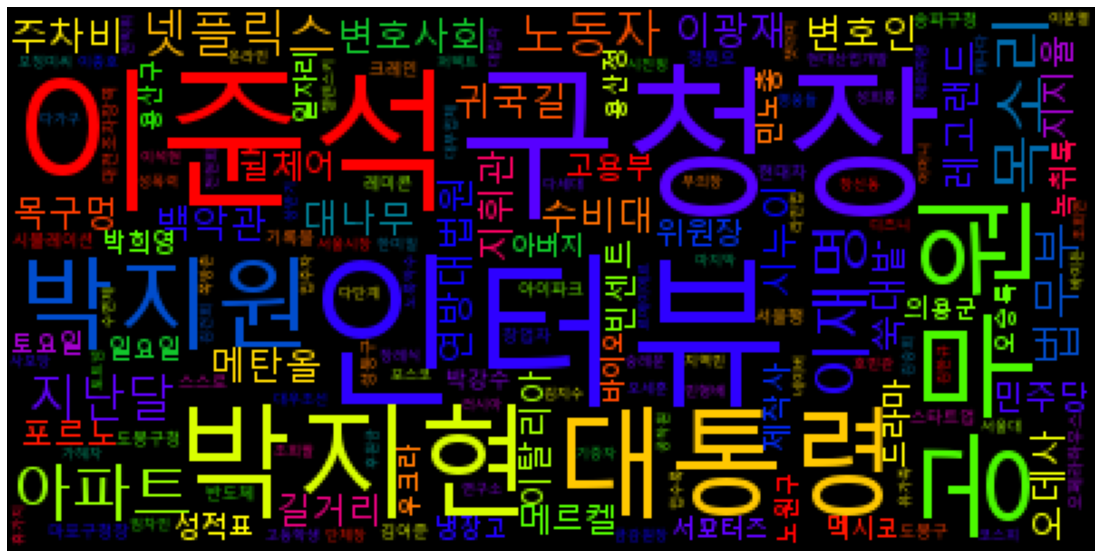

In [141]:
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

In [142]:
content_vocab = {}
preprocessed_contents = []
for sentence in whole_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in content_vocab:
                content_vocab[word] = 0 
            content_vocab[word] += 1
            preprocessed_contents.append(word) 
print(content_vocab)
print(preprocessed_contents)

{'.픽사베': 1, '대나무': 6, '로스앤젤레스': 1, '자연사': 1, '박물관': 4, '왕샤오밍': 1, '자이언트': 3, '락토스': 2, '윈난성': 1, '손가락': 1, '판다가짜엄지': 1, '뉴시스': 7, '전문가': 12, '현대판': 1, '몸무게': 1, '갈고리': 1, '육식성': 1, '연합뉴스': 20, '변호사회': 3, '이준석': 16, '변호인': 2, '호국단': 1, '변호사': 11, '공동정범': 2, '대한변호사협회': 1, '지난달': 74, '연구소': 11, '녹취록': 3, '확인서': 3, '비대위원장': 5, '민형배': 8, '박지현': 11, '더불어민주당': 25, '위원장': 52, '여의도': 10, '그린벨트': 8, '민주당': 48, '정치인': 6, '이광재': 2, '온라인': 37, '아버지': 12, '페이스북': 12, '사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다': 1, '‘조유나': 1, '일가족': 5, '지지자': 1, '온정주의': 1, '출마자': 3, '이재명': 18, '컷오프': 2, '한동안': 4, '목소리': 15, '강병원': 4, '박용진': 3, '강경파': 4, '처럼회': 1, '오른쪽': 5, '반성문': 1, '독재자': 1, '인터뷰': 13, '포인트': 14, '상임위': 1, '.처럼회': 1, '.대해민': 1, '본회의': 2, '찬성표': 1, '관계자': 39, '이재명리기': 1, '시누이': 4, '서울동작경찰서': 1, '동작구': 1, '메탄올': 2, '레고랜드': 7, '‘주차료': 1, '주차장': 3, '테마파크': 1, '장애인': 5, '스티커': 3, '안전사고': 2, '환경청': 4, '행정부': 4, '발전소': 10, '온실가스': 4, '뉴욕타임스': 3, '바이든': 26, '대통령': 192, '미국연방대법원': 1, '워싱턴': 3, '광범위': 2, '배출량': 1, '로이터': 8, '

In [143]:
content_counter = Counter(preprocessed_contents)
content_counter

Counter({'.픽사베': 1,
         '대나무': 6,
         '로스앤젤레스': 1,
         '자연사': 1,
         '박물관': 4,
         '왕샤오밍': 1,
         '자이언트': 3,
         '락토스': 2,
         '윈난성': 1,
         '손가락': 1,
         '판다가짜엄지': 1,
         '뉴시스': 7,
         '전문가': 12,
         '현대판': 1,
         '몸무게': 1,
         '갈고리': 1,
         '육식성': 1,
         '연합뉴스': 20,
         '변호사회': 3,
         '이준석': 16,
         '변호인': 2,
         '호국단': 1,
         '변호사': 11,
         '공동정범': 2,
         '대한변호사협회': 1,
         '지난달': 74,
         '연구소': 11,
         '녹취록': 3,
         '확인서': 3,
         '비대위원장': 5,
         '민형배': 8,
         '박지현': 11,
         '더불어민주당': 25,
         '위원장': 52,
         '여의도': 10,
         '그린벨트': 8,
         '민주당': 48,
         '정치인': 6,
         '이광재': 2,
         '온라인': 37,
         '아버지': 12,
         '페이스북': 12,
         '사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다': 1,
         '‘조유나': 1,
         '일가족': 5,
         '지지자': 1,
         '온정주의': 1,
         '출마자': 3,
         '이재명': 18,
        

(-0.5, 399.5, 199.5, -0.5)

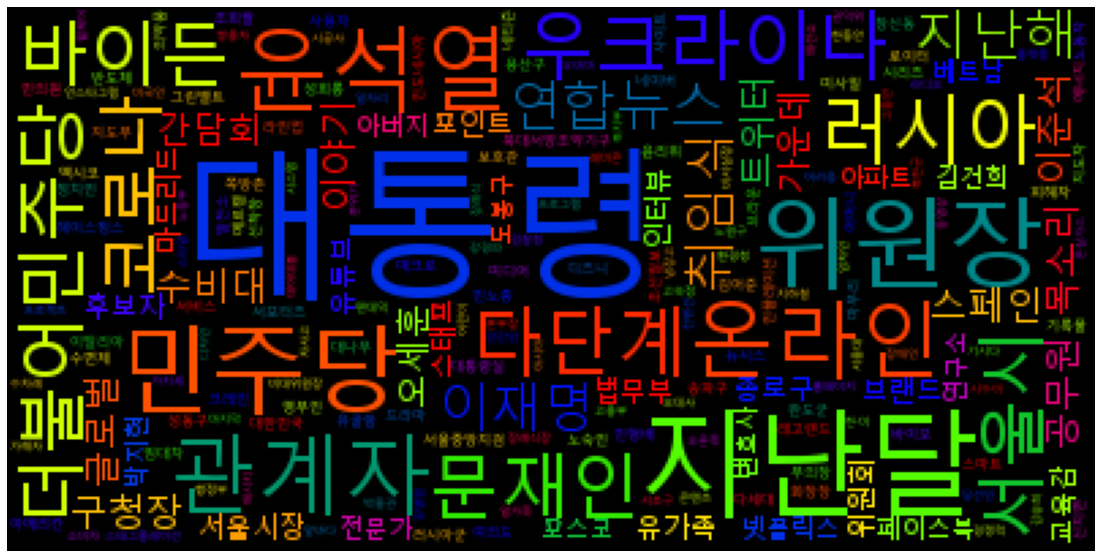

In [144]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

In [146]:
cos_sim_.to_csv("tfcos_sim.csv", encoding='utf-8-sig')
cos_sim_tfidf_.to_csv("tfidfcos_sim.csv", encoding='utf-8-sig')